<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/An%C3%A1lisisSupervivencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 3.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=248c0af1a8483046dd95374a555236e1443633f463cc361a9fde99b7a6effc2f
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, NelsonAalenFitter, CoxPHFitter
from lifelines.statistics import logrank_test

# 1. Creación de la base de datos
np.random.seed(42)
n_pacientes = 50

data = pd.DataFrame({
    'ID': range(1, n_pacientes+1),
    'tiempo': np.random.exponential(scale=180, size=n_pacientes).astype(int) + 1,
    'evento': np.random.binomial(1, 0.65, n_pacientes),
    'edad': np.random.normal(55, 15, n_pacientes).astype(int),
    'tratamiento': np.random.choice(['A', 'B'], n_pacientes),
    'fumador': np.random.choice(['Sí', 'No'], n_pacientes, p=[0.4, 0.6])
})

# Aseguramos que la edad no sea negativa
data['edad'] = data['edad'].apply(lambda x: x if x > 0 else 0)

print("1. Base de datos creada:")
data.head(10)

1. Base de datos creada:


,ID,tiempo,evento,edad,tratamiento,fumador
0,1,85,0,56,B,Sí
1,2,542,0,50,B,Sí
2,3,238,0,56,A,No
3,4,165,0,25,A,No
4,5,31,1,51,B,No
5,6,31,0,60,A,Sí
6,7,11,1,77,B,Sí
7,8,363,1,47,B,No
8,9,166,1,42,A,No
9,10,222,1,47,A,No


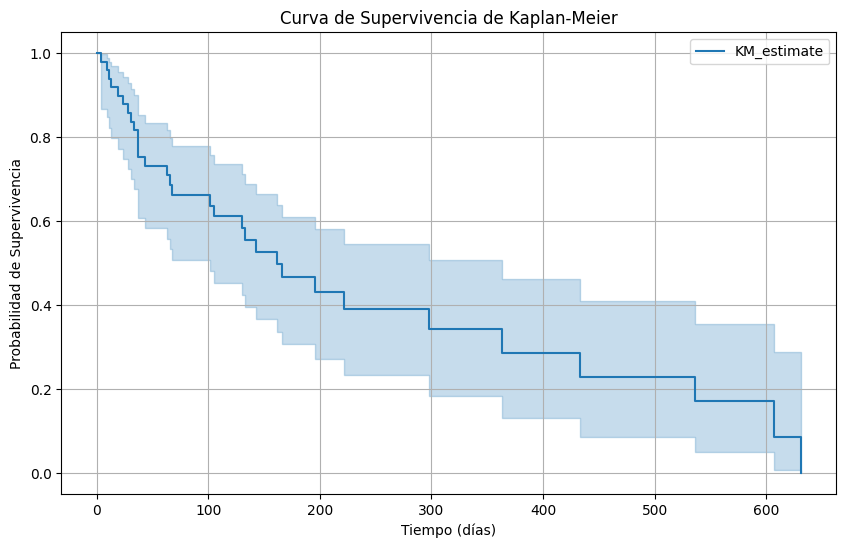

In [5]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# 2. Ajustar la curva de Kaplan-Meier
kmf = KaplanMeierFitter()

# Se obtiene la duración y el evento
duraciones = data['tiempo']
eventos = data['evento']

# Se ajusta el modelo Kaplan-Meier
kmf.fit(durations=duraciones, event_observed=eventos)

# 3. Gráfico de la curva de Kaplan-Meier con intervalos de confianza
plt.figure(figsize=(10, 6))
kmf.plot_survival_function(ci_show=True)  # Se añade ci_show=True para mostrar el IC
plt.title('Curva de Supervivencia de Kaplan-Meier')
plt.xlabel('Tiempo (días)')
plt.ylabel('Probabilidad de Supervivencia')
plt.grid()
plt.show()

In [4]:
# 3. Obtener los datos de la función de supervivencia
survival_df = kmf.survival_function_

# Calcular el número de pacientes en riesgo y el número de eventos en cada punto en el tiempo
survival_df['nº sin eventos'] = kmf.event_table.at_risk
survival_df['nº eventos'] = kmf.event_table.observed

# Calcular el riesgo como la proporción de pacientes sin eventos
survival_df['% riesgo'] = survival_df['nº sin eventos'] / len(data)

# Crear la nueva columna de eventos acumulados
survival_df['eventos acumulados'] = survival_df['nº eventos'].cumsum()

# Convertir el índice a columna 'timeline'
survival_df = survival_df.reset_index().rename(columns={'index': 'timeline'})

# Reordenar las columnas
survival_df = survival_df[['timeline', 'nº sin eventos', 'nº eventos', 'eventos acumulados', '% riesgo']]

# 4. Mostrar la tabla actualizada
survival_df

,timeline,nº sin eventos,nº eventos,eventos acumulados,% riesgo
0,0.0,50,0,0,1.00
1,4.0,50,1,1,1.00
2,7.0,49,0,1,0.98
3,9.0,48,1,2,0.96
4,11.0,47,1,3,0.94
5,13.0,46,1,4,0.92
6,19.0,45,1,5,0.90
7,24.0,44,1,6,0.88
8,28.0,43,1,7,0.86
9,31.0,42,1,8,0.84



2. Tabla de función de riesgo acumulado:
          NA_estimate
timeline             
0.0          0.000000
4.0          0.020000
7.0          0.020000
9.0          0.040833
11.0         0.062110


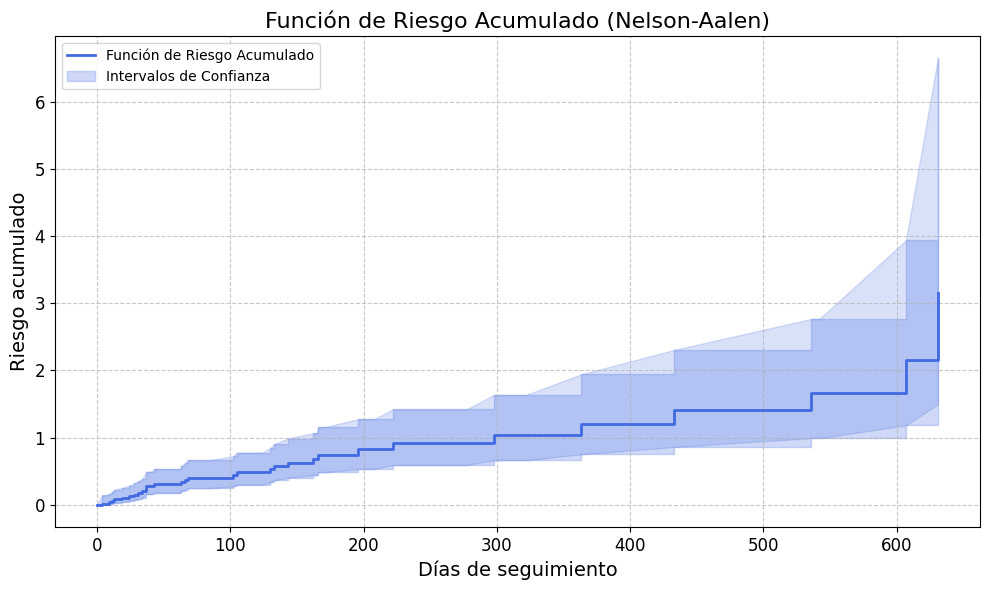

In [12]:
import matplotlib.pyplot as plt
from lifelines import NelsonAalenFitter
import pandas as pd

# 2. Análisis de función de riesgo (Nelson-Aalen)
plt.figure(figsize=(10, 6))
naf = NelsonAalenFitter()
naf.fit(data['tiempo'], event_observed=data['evento'])

# Mostramos la tabla de función de riesgo acumulado
print("\n2. Tabla de función de riesgo acumulado:")
print(naf.cumulative_hazard_.head())

# Gráfico de función de riesgo acumulado
naf.plot_cumulative_hazard(ci_show=True, color='royalblue', linewidth=2)  # Usar color y un ancho de línea específico
plt.title('Función de Riesgo Acumulado (Nelson-Aalen)', fontsize=16)
plt.ylabel('Riesgo acumulado', fontsize=14)
plt.xlabel('Días de seguimiento', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Mejorar la visibilidad de la cuadrícula

# Añadir leyenda
plt.legend(["Función de Riesgo Acumulado", "Intervalos de Confianza"], loc="upper left")

# Área sombreada para IC
plt.fill_between(naf.cumulative_hazard_.index,
                 naf.confidence_interval_["NA_estimate_lower_0.95"],  # Cambia los nombres de acuerdo a la salida que viste
                 naf.confidence_interval_["NA_estimate_upper_0.95"],
                 color='royalblue', alpha=0.2)  # Área sombreada para IC

# Mostrar gráfico
plt.tight_layout()  # Ajustar los márgenes
plt.show()

In [11]:
naf.confidence_interval_

,NA_estimate_lower_0.95,NA_estimate_upper_0.95
0.0,0.000000,0.000000
4.0,0.002817,0.141981
7.0,0.002817,0.141981
9.0,0.010209,0.163317
11.0,0.020024,0.192647
13.0,0.031456,0.223511
19.0,0.044125,0.254984
24.0,0.057824,0.286890
28.0,0.072428,0.319221
31.0,0.087860,0.352018


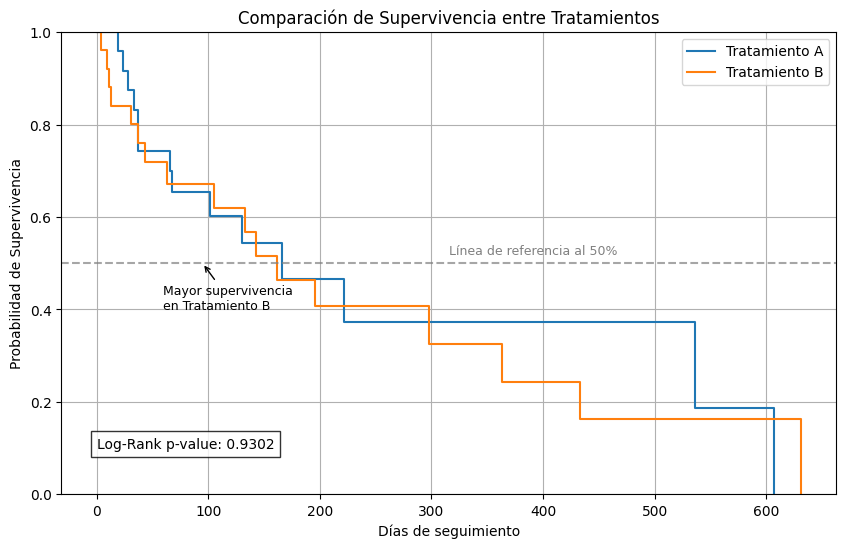

In [ ]:
# 3. Análisis por tratamiento (Log-Rank) MEJORADO
plt.figure(figsize=(10,6))
kmf = KaplanMeierFitter()

# Colores diferenciados para cada tratamiento
colors = ['#1f77b4', '#ff7f0e']

for i, tratamiento in enumerate(['A', 'B']):
    mask = data['tratamiento'] == tratamiento
    kmf.fit(data[mask]['tiempo'],
            data[mask]['evento'],
            label=f'Tratamiento {tratamiento}')
    kmf.plot_survival_function(ci_show=False, color=colors[i])

# Test log-rank
resultado_logrank = logrank_test(data[data['tratamiento'] == 'A']['tiempo'],
                                 data[data['tratamiento'] == 'B']['tiempo'],
                                 data[data['tratamiento'] == 'A']['evento'],
                                 data[data['tratamiento'] == 'B']['evento'])

# Añadir línea horizontal de referencia y texto del p-valor
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)
plt.text(x=0.5*max(data['tiempo']), y=0.52,
         s=f'Línea de referencia al 50%',
         color='gray', fontsize=9)

# Anotación de separación de curvas
plt.annotate('Mayor supervivencia\nen Tratamiento B',
             xy=(np.median(data[data['tratamiento'] == 'B']['tiempo']), 0.5), # Assigned 0.75 to y for better visual
             xytext=(60, 0.4),
             arrowprops=dict(facecolor='black', arrowstyle='->'), # Corrected to assign the dictionary to arrowprops
             fontsize=9) # Corrected to assign 9 to fontsize

# Texto del p-valor en el gráfico
plt.text(x=0, y=0.1,
         s=f'Log-Rank p-value: {resultado_logrank.p_value:.4f}',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.title('Comparación de Supervivencia entre Tratamientos')
plt.ylabel('Probabilidad de Supervivencia')
plt.xlabel('Días de seguimiento')
plt.grid(True)
plt.ylim(0, 1)
plt.show()

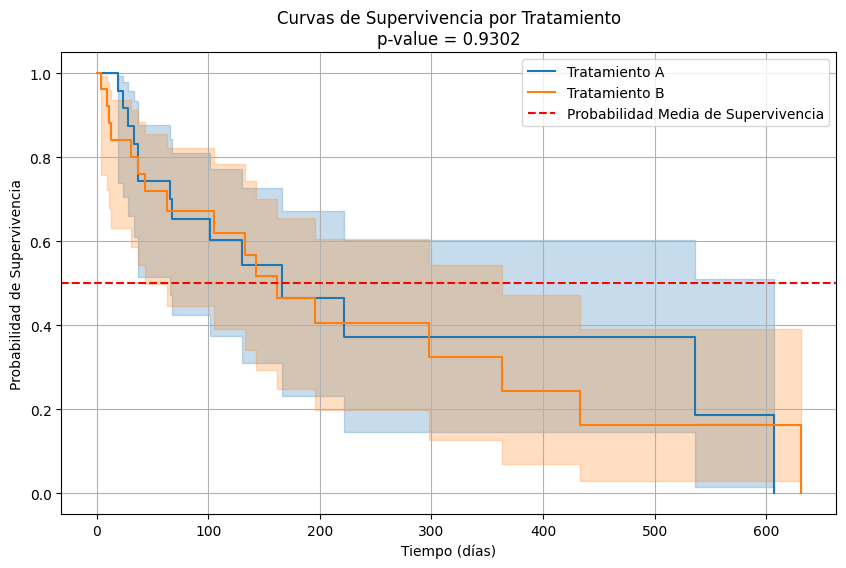

In [ ]:
# 2. Ajustar la curva de Kaplan-Meier por tratamiento
plt.figure(figsize=(10, 6))
kmf = KaplanMeierFitter()

# Filtros para tratamientos
mask_A = data['tratamiento'] == 'A'
mask_B = data['tratamiento'] == 'B'

# Ajustamos y graficamos para tratamiento A
kmf.fit(data[mask_A]['tiempo'], data[mask_A]['evento'], label='Tratamiento A')
kmf.plot_survival_function()

# Ajustamos y graficamos para tratamiento B
kmf.fit(data[mask_B]['tiempo'], data[mask_B]['evento'], label='Tratamiento B')
kmf.plot_survival_function()

# 3. Análisis por tratamiento (Log-Rank test)
# Ejecutar Log-Rank test
results = logrank_test(
    data.loc[mask_A, 'tiempo'],
    data.loc[mask_B, 'tiempo'],
    event_observed_A=data.loc[mask_A, 'evento'],
    event_observed_B=data.loc[mask_B, 'evento']
)

# Obtener el p-value
p_value = results.p_value

# Calcular la probabilidad media de supervivencia (promedio de las curvas)
survival_probs_A = kmf.survival_function_
kmf.fit(data[mask_B]['tiempo'], data[mask_B]['evento'])  # Ajustar de nuevo para el tratamiento B
survival_probs_B = kmf.survival_function_

# Tomar la media de las probabilidades de supervivencia
mean_survival_prob = (survival_probs_A.values + survival_probs_B.values) / 2
mean_time = np.linspace(0, max(data['tiempo']), len(mean_survival_prob))

# Graficar la línea horizontal de la probabilidad media
plt.axhline(y=0.5, color='r', linestyle='--', label='Probabilidad Media de Supervivencia')

# Mostrar el p-value en la gráfica
plt.title(f'Curvas de Supervivencia por Tratamiento\np-value = {p_value:.4f}')
plt.xlabel('Tiempo (días)')
plt.ylabel('Probabilidad de Supervivencia')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# 4. Análisis de Cox para fumadores
data['fumador_num'] = data['fumador'].map({'Sí': 1, 'No': 0})

cph = CoxPHFitter()
cph.fit(data[['tiempo', 'evento', 'fumador_num']],
        duration_col='tiempo',
        event_col='evento')

print("\n4. Resultados del modelo de Cox:")
cph.summary




4. Resultados del modelo de Cox:


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
fumador_num,-0.711524,0.490896,0.390856,-1.477587,0.054539,0.228188,1.056054,0.0,-1.820427,0.068694,3.863671


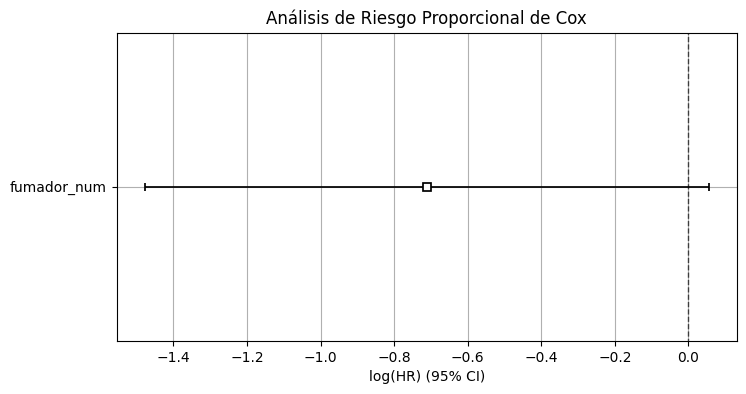

In [ ]:
# Gráfico de los coeficientes
plt.figure(figsize=(8,4))
cph.plot()
plt.title('Análisis de Riesgo Proporcional de Cox')
plt.grid(True)
plt.show()